In [1]:
import os     
import numpy as np
import tensorflow as tf
import pandas as pd
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from tensorflow.keras.layers import Activation,Flatten,Dense,Dropout
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
tf.__version__

'2.3.0'

In [2]:
classes = ["A", "B", "C"]

In [3]:
idg = ImageDataGenerator(rescale=1./255, dtype=('float32'),
                         rotation_range=40,  # 隨機旋轉0~40度
                         width_shift_range=0.4,  # 隨機水平偏移的幅度  參數0~1之間  隨機偏移距離0~圖片長*參數
                         height_shift_range=0.4,  # 隨機垂直偏移的幅度  參數0~1之間  隨機偏移距離0~圖片寬*參數
                         shear_range=0.4,  # 按比例平移
                         fill_mode='nearest',
                         validation_split=0.2,
                         zoom_range=0.4,  # 隨機縮放的幅度 參數0~1放大   大於1變小
                         horizontal_flip=True)
idg2 = ImageDataGenerator(rescale=1./255)


In [4]:
train_directory = idg.flow_from_directory(
    directory=os.path.join("./train"),
    target_size=(224, 224),
    classes=classes,
    batch_size=32,
    class_mode='categorical',
    subset='training')

Found 2055 images belonging to 3 classes.


In [5]:
validation_directory = idg.flow_from_directory(
    directory=os.path.join("./train"),
    target_size=(224, 224),
    classes=classes,
    batch_size=32,
    class_mode='categorical',
    subset='validation')

Found 511 images belonging to 3 classes.


In [6]:
model = Sequential()
model.add(tf.keras.applications.MobileNet(include_top=False, weights='imagenet', input_shape=(224, 224, 3)))
#model.add(tf.keras.applications.ResNet50(include_top=False, weights='imagenet', input_shape=(224 ,224 ,3)))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(1024, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(3, activation='softmax'))
print(model.summary())

2022-01-13 01:03:43.577144: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN)to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-13 01:03:43.586448: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fd71df48670 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-13 01:03:43.586458: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenet_1.00_224 (Function (None, 7, 7, 1024)        3228864   
_________________________________________________________________
flatten (Flatten)            (None, 50176)             0         
_________________________________________________________________
dropout (Dropout)            (None, 50176)             0         
_________________________________________________________________
dense (Dense)                (None, 1024)              51381248  
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 3075      
Total params: 54,613,187
Trainable params: 54,591,299
Non-trainable params: 21,888
_______________________________________

In [7]:
op=Adam(lr=0.0001)
model.compile(loss='categorical_crossentropy',
              optimizer=op, metrics=['accuracy'])

In [8]:
stop=EarlyStopping(monitor='val_loss', patience=3,verbose=1)
checkpoint = tf.keras.callbacks.ModelCheckpoint(
    './MobileNetmodel/',
    monitor='val_loss',
    save_best_only=True,
    verbose=0 ) 

In [9]:
fit_history=model.fit_generator(train_directory,
                                steps_per_epoch=40,
                                epochs=10,
                                validation_data=validation_directory,
                                validation_steps=20,
                                callbacks=[stop,checkpoint]) 

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
40/40 [==============================] - ETA: 0s - loss: 2.0299 - accuracy: 0.6940

/Users/taeyeon/Library/Python/3.8/lib/python/site-packages/PIL/Image.py:945: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.


2022-01-13 01:04:48.596746: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


INFO:tensorflow:Assets written to: ./MobileNetmodel/assets
40/40 [==============================] - 68s 2s/step - loss: 2.0299 - accuracy: 0.6940 - val_loss: 1.0547 - val_accuracy: 0.8337
Epoch 2/10
40/40 [==============================] - 55s 1s/step - loss: 1.1477 - accuracy: 0.8120
Epoch 3/10
40/40 [==============================] - 53s 1s/step - loss: 0.9018 - accuracy: 0.8510
Epoch 4/10
40/40 [==============================] - 53s 1s/step - loss: 0.7295 - accuracy: 0.8502
Epoch 5/10
40/40 [==============================] - 54s 1s/step - loss: 0.6013 - accuracy: 0.8531
Epoch 6/10
40/40 [==============================] - 55s 1s/step - loss: 0.3753 - accuracy: 0.8869
Epoch 7/10
40/40 [==============================] - 54s 1s/step - loss: 0.3775 - accuracy: 0.8972
Epoch 8/10
40/40 [==============================] - 56s 1s/step - loss: 0.3367 - accuracy: 0.8908
Epoch 9/10
40/40 [==============================] - 57s 1s/step - loss: 0.3186 - accuracy: 0.9020
Epoch 10/10
40/40 [=========

In [10]:
model = load_model('./model/')

In [11]:
import matplotlib.pyplot as plt
def show_train_history(fit_history,train,validation):
    plt.plot(fit_history.history[train])
    plt.plot(fit_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

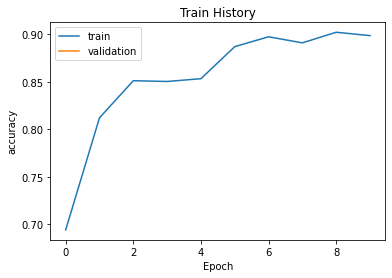

In [12]:
show_train_history(fit_history,'accuracy','val_accuracy')

In [13]:
test_path = './test/test.csv'
df = pd.read_csv(test_path, sep=',', skiprows=1,  names=['id', 'label'])
df['id'] = df['id'].astype('str')

test_datagen = ImageDataGenerator(rescale=1/255.)

test_directory = test_datagen.flow_from_dataframe(df, './test/testtest',
                                                x_col='id', y_col='label',
                                                target_size=(224,224),
                                                interpolation='bicubic',
                                                class_mode=None,
                                                shuffle=False,
                                                batch_size=1)

Found 102 validated image filenames.


In [14]:
predict = model.predict_generator(test_directory,verbose=1)
predict[:10]

Instructions for updating:
Please use Model.predict, which supports generators.
102/102 [==============================] - 1s 10ms/step


array([[0.63695884, 0.24491256, 0.11812858],
       [0.49578133, 0.19589488, 0.3083239 ],
       [0.35770547, 0.24745657, 0.39483792],
       [0.3865181 , 0.23303057, 0.38045138],
       [0.3510133 , 0.24727672, 0.40171   ],
       [0.8593711 , 0.127124  , 0.01350486],
       [0.4124334 , 0.24222901, 0.3453376 ],
       [0.39096686, 0.18824135, 0.42079183],
       [0.43547177, 0.22005375, 0.34447446],
       [0.43547177, 0.22005375, 0.34447446]], dtype=float32)

In [15]:
pred_max = np.argmax(predict, axis = 1)
print(len(pred_max))
pred_max[:10]

102


array([0, 0, 2, 0, 2, 0, 0, 2, 0, 0])

In [16]:
label_dict = {0: "A", 1: "B", 2: "C"}

In [17]:
test_label = df['label']
print(label_dict)
pd.crosstab(test_label,pred_max,
            rownames=['label'],colnames=['predict'])

{0: 'A', 1: 'B', 2: 'C'}


predict,0,2
label,,
0,28,6
1,31,3
2,14,20


In [18]:
def show_Predicted_Probability(i):
    print('label:',label_dict[test_label[i]],
          'predict:',label_dict[pred_max[i]])
    plt.figure(figsize=(2,2))
    plt.imshow(np.reshape(test_directory[i],(224, 224,3)))
    plt.show()
    for j in range(2):
        print(label_dict[j]+' Probability:%1.5f'%(predict[i][j]))

label: A predict: C


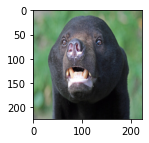

A Probability:0.35101
B Probability:0.24728


In [19]:
show_Predicted_Probability(4)

In [20]:
df = pd.DataFrame({'label':test_label, 'predict':pred_max})
df[(df.label==0)&(df.predict==1)]

,label,predict


label: A predict: C


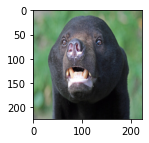

A Probability:0.35101
B Probability:0.24728


In [22]:
show_Predicted_Probability(4)
